In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

Let’s read the GFF file

In [2]:
gff = pd.read_csv('gff.tsv', sep='\t', comment='#')

In [3]:
gff.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


In [4]:
gff.iloc[1].attributes

'Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,'

We need to find out which value of the *Parent* attribute is the most frequent. Let’s try to find this out first using string methods, and then using regular expressions.

In [5]:
list=[]

for i in gff.attributes.str.split('Parent='):
    list.append(i[-1])

In [6]:
parent = pd.Series(list)

In [7]:
parent.value_counts()

XM_001475631.1              309
XM_001475631.1,             170
NC_000083.5:LOC100040603     33
Name: count, dtype: int64

Regular expressions

In [8]:
pattern = r'Parent=(.+\w)'

In [9]:
gff.attributes.str.extract(pattern).value_counts()

XM_001475631.1              479
NC_000083.5:LOC100040603     33
Name: count, dtype: int64

What is the most frequent value in the *type* column?

In [10]:
gff.type.value_counts()

type
exon               201
CDS                170
five_prime_UTR      47
mRNA                33
three_prime_UTR     32
protein             29
Name: count, dtype: int64

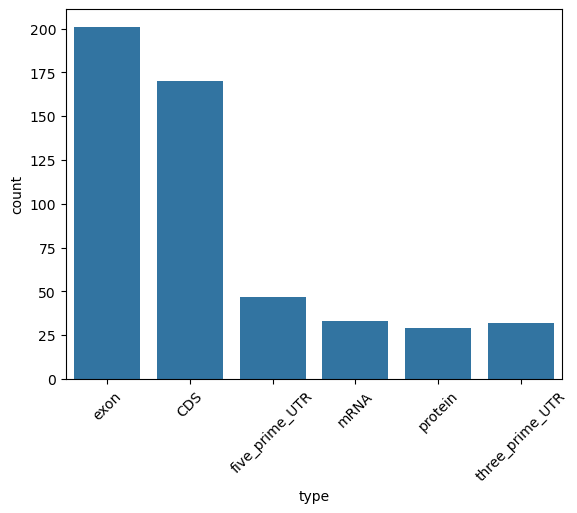

In [11]:
fig, ax = plt.subplots()
sns.countplot(data=gff, x='type', ax=ax)
ax.tick_params(axis='x', rotation=45)